# Running the training loop

Până acuma în secțiunea curentă am reușit să creem un set de date, să ne împărțim setul de date într-un set de antrenare și unul de testare, am creat un model, am făcut predicții pe datele de testare, am selectat un loss function și un optimizer și am creat codul pentru a antrena un model de Deep Learning din PyTorch. Urmează partea în care trebuie să antrenăm modelul folosind acel cod de antrenare (bucla de antrenare)

In [1]:
# importing the libraries
import torch
from torch import nn

import matplotlib.pyplot as plt

In [2]:
# creating the dataset
start = 0
end = 1
step = 0.02

# creating the 'known' parameters
weight = 0.7
bias = 0.3

# creating the features as a tensor
X = torch.arange(start, end, step).unsqueeze(dim=-1)

# creatint the labels
y = weight * X + bias

# splitting the dataset into train and test sets
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# printing the lenght of the train set and test set
print(f'Lenght of train set Features: {len(X_train)}')
print(f'Lenght of train set labels: {len(y_train)}')

print(f'Lenght of test set Features: {len(X_test)}')
print(f'Lenght of test set labels: {len(y_test)}')

Lenght of train set Features: 40
Lenght of train set labels: 40
Lenght of test set Features: 10
Lenght of test set labels: 10


In [3]:
# visualize the data with a help of a function and matplotlib

def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
    ):
    # creating a figure
    plt.figure(figsize=(10, 7))

    # plotting the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=5, label="Training Data")

    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")

    # checking if we have predictions
    if predictions is not None:
        # plotting the predictions in red
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    # displaying the legend
    plt.legend() 

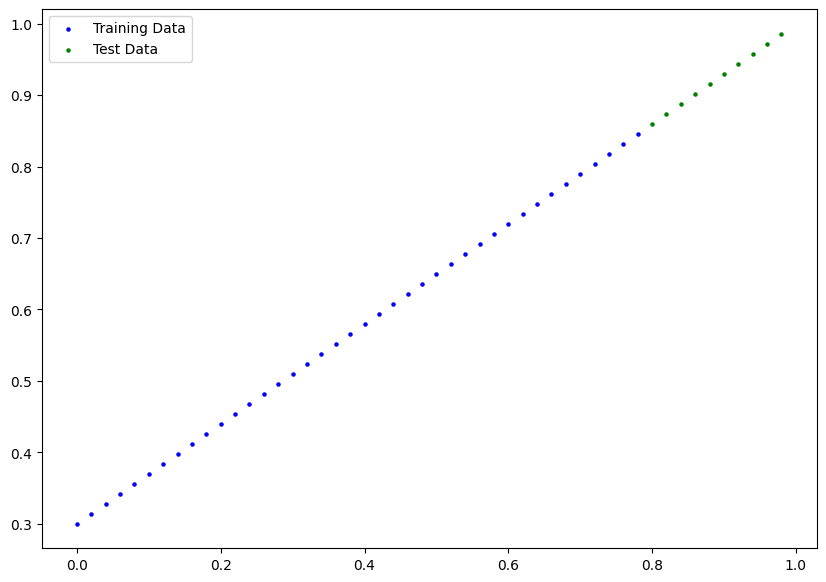

In [4]:
plot_predictions()

In [5]:
# creating a model
class LinearRegressionModel(nn.Module):
    # all models must inherite the nn.Module modul from torch

    # creating the constructor of the class
    def __init__(self):
        # it also must inherit the constructor of the class interited
        super().__init__()

        # creating the parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    # overwriting the forward() method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # all models should overwrite the forward() method
        # this is where we specify what computation need to be made by the model
        return self.weight * x + self.bias

In [6]:
# creating an instance of the model
# setting the seed before creating the model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [7]:
# printing the model parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# making predictions with the untrained model
with torch.inference_mode():
    y_preds_initial = model_0(X_test)

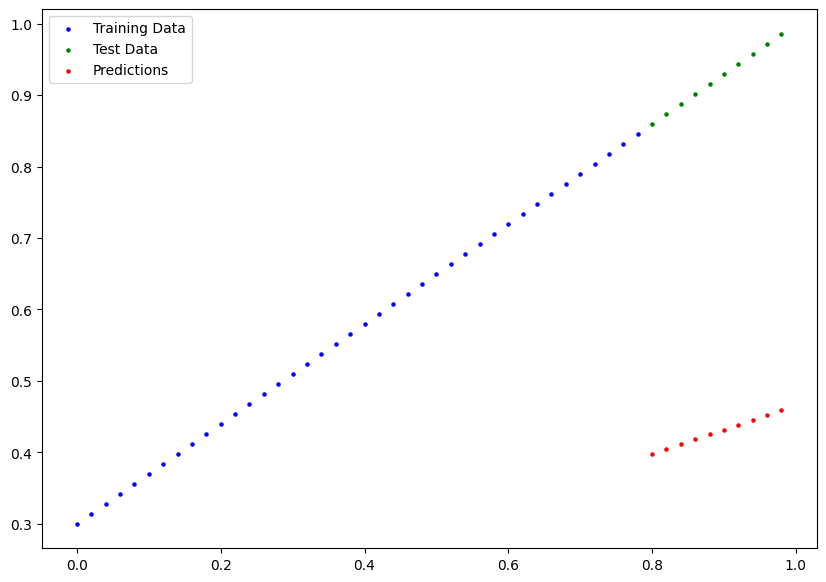

In [9]:
# plotting the predictions
plot_predictions(predictions=y_preds_initial)

In [10]:
# setting up a loss function and an optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) 

In [ ]:
# DO NOT RUN THIS NOW!!
# loop for traing a PyTorch model
# an epoch represents a loop thourgh the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to train mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

Partea de antrenare a unui model este extrem de importantă deoarece așa învață modelul nostru, așa găsește tot felul de pattern-uri în setul de date și așa face predicții mai bune. Codul de mai sus încă nu l-am rulat, deoarece rularea codului să producă modificări în parametrii modelului. Să ne uităm pentru început la parametrii default pe care îi are acest model (parametrii au fost creați cu valori random)

In [11]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Se poate observa că valoarea pentru parametrul de 'weight' este 0.3367, iar cea pentru 'bias' este 0.1288. Atunci când am creat setul de date am creat și avele valori pentru așa numiți 'known parameters'

In [12]:
weight, bias

(0.7, 0.3)

Ce trebuie să se întâmple în momentul în care antrenăm un model de Deep learning, este să ducă acele valori ale parametrilor modelului (valori setate random) cât mai aproate de valorile adevărate ale parametrilor (în mod normal nu există valori adevărate, ci valori cât mai potrivite). În continuare o să rulăm odată codul de antrenare a modelului după care o să vedem care sunt parametrii modelului după ce s-a antrenat modelul respectiv

In [13]:
# RUNNING FOR 1 EPOCH
# loop for traing a PyTorch model
# an epoch represents a loop thourgh the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to train mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

Acum după ce am rulat acea buclă de antrenare putem să ne uităm la parametrii modelului pentru a vedea dacă s-a produs ceva schimare

In [14]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3456])), ('bias', tensor([0.1388]))])

După cum se poate obsera, valorile parametrilor s-au modificat după ce am rulat odată bucla aceea de antrenare. Valoarea pentru parametrul 'bias' a crescut de la 0.1288 la 0.1388 (ceea ce este bine, deoarece valoarea reală a acestui parametru este 0.3. Din moment ce valoarea crește, înseamnă că partea de antrenare funcționează bine). Ca să vedem mai bine că partea aceasta de antrenare funcționează putem să facem print la loss pentru a vedea valaoarea pe care o are (cu cât valoarea este mai apropiată de 0, cu atâta este mai bine)

In [15]:
# RUNNING FOR 1 EPOCH
# loop for traing a PyTorch model
# an epoch represents a loop thourgh the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to train mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)
    print(loss)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

tensor(0.4766, grad_fn=<MeanBackward0>)


In [16]:
# RUNNING FOR 1 EPOCH
# loop for traing a PyTorch model
# an epoch represents a loop thourgh the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to train mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)
    print(loss)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

tensor(0.4587, grad_fn=<MeanBackward0>)


Se poate observa faptul că valoare acelei variabile 'loss' (variabilă care calculează perfomanța modelului) tot scade la fiecare rulare a acelei bucle de antrenare, are o valoare tot mai apropiată de 0, ceea ce trebuie să se întâmple atunci când un model este antrenat așa cum trebuie.

In [36]:
# RUNNING FOR 1 EPOCH
# loop for traing a PyTorch model
# an epoch represents a loop thourgh the data

epochs = 1

# Step 0. Looping through the data
for epoch in range(epochs):

    # setting the model to train mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)
    print(f'Loss: {loss}')

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

    # print model parameters
    print(model_0.state_dict())

Loss: 0.10027442127466202
OrderedDict([('weight', tensor([0.5414])), ('bias', tensor([0.3588]))])


Am rulat codul de mai sus (acea buclă de antrenare) de aproximativ 10-15 ori și am ajuns la un loss de 0.1, ceea ce este extrem de bine. O să facem acuma predicții noi cu acest model pentru a vedea cum se comportă acuma modelul respectiv pe datele de testare

In [37]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

Old predictions


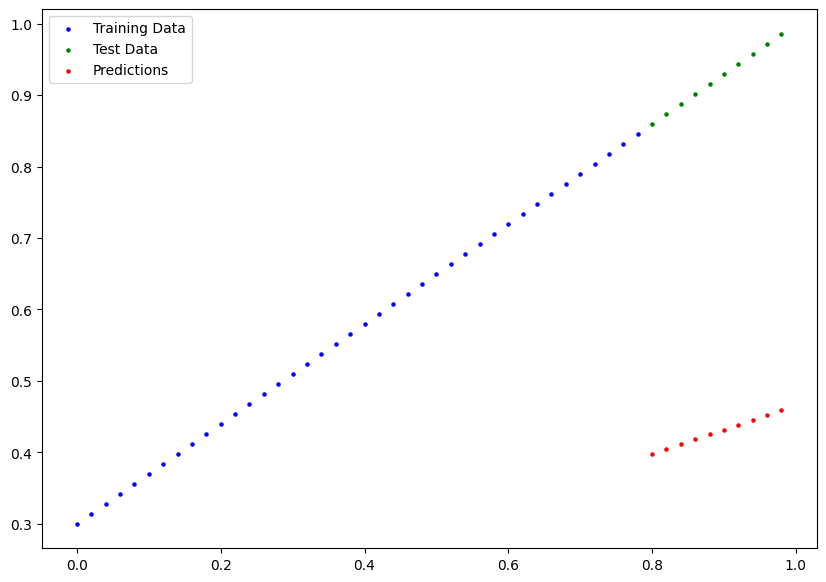

In [39]:
print('Old predictions')
plot_predictions(predictions=y_preds_initial)

New Predictions


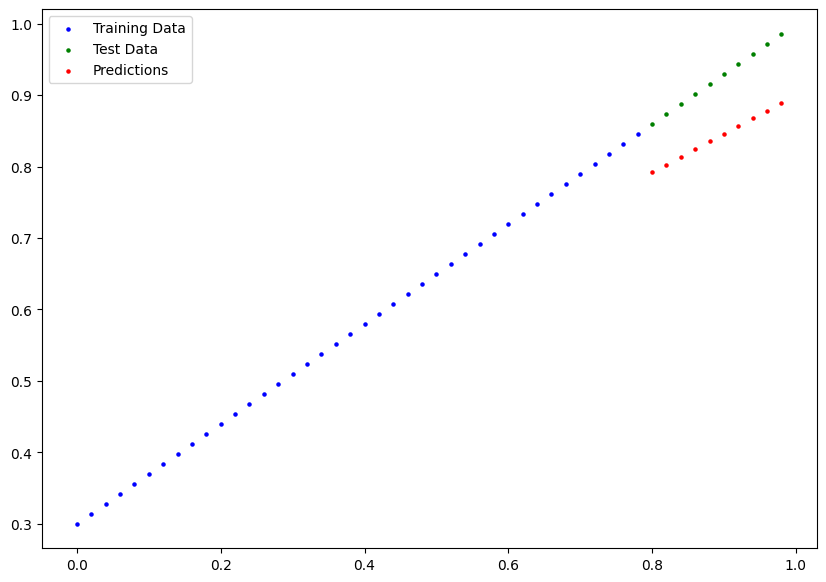

In [41]:
print('New Predictions')
plot_predictions(predictions=y_preds_new)

După cum se poate observa și din plot, noile predicții ale modelului antrenat sunt mult mai bine, predicțiile fiind mult mai apropiate de label-urile de testare. Acest lucru s-a întâmplat doar după o rulare aproximativ de 10 epoci, am ajuns la un asemenea rezultat.

## Recapitulare

1. În această secțiune am observat cum anume se modifică parametrii modelului atunci când antrenăm modelul și cum valoare de la funcția loss se micșorează de fiecare dată atunci când se rulează acea buclă de antrenare